In [133]:
#%%
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading the Dataset

In [3]:

#%%
# Loading the dataset
file_path = "/Users/nawarajadhikari/Desktop/ASDS/6302/Projects/Project_3/loan_data-1.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
xls.sheet_names


['Non-Normalized_Financial_Datase']

In [4]:
# Loading the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name='Non-Normalized_Financial_Datase')

# Display the first few rows of the dataset
df.head()



,Age,Income,Credit_Score,Loan_Amount,Years_with_Bank,Num_of_Products,Is_Employed,Marital_Status,Education_Level,Has_Credit_Card,Loan_Default
0,56,86788.0,617.0,48059.0,28,2,1,Single,Bachelor,1,0
1,69,107879.0,NaN,89078.0,7,4,1,Divorced,PhD,1,0
2,46,63827.0,681.0,NaN,1,1,1,Single,High School,1,0
3,32,132188.0,532.0,66269.0,25,3,1,Divorced,Master,1,0
4,60,30655.0,643.0,80986.0,11,4,1,NaN,Bachelor,0,0


In [29]:
# This the first five rows of the datasets with 11 diufferent columns.
# The name of the columns are: Age, income, Credit_Score, Loan_Amount, Years_with_Bank, Num_of_Products, Is_Employeed, Matrial_Status, Education_Level, Has_credit_card, and Loan_default.
# Some of the columns contains missing value. We need to handle it while creating predictive modeling.



#  Checking missing values and summarize the dataset.

In [5]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Getting summary statistics of the dataset
summary_statistics = df.describe(include='all')

# Displaying results
missing_values, summary_statistics


(Age                  0
 Income             150
 Credit_Score       149
 Loan_Amount        148
 Years_with_Bank      0
 Num_of_Products      0
 Is_Employed          0
 Marital_Status     150
 Education_Level      0
 Has_Credit_Card      0
 Loan_Default         0
 dtype: int64,
                 Age         Income  Credit_Score    Loan_Amount  \
 count   2000.000000    1850.000000   1851.000000    1852.000000   
 unique          NaN            NaN           NaN            NaN   
 top             NaN            NaN           NaN            NaN   
 freq            NaN            NaN           NaN            NaN   
 mean      43.805500   86364.549730    577.376115   52853.791985   
 std       14.929203   36067.521723    157.648251   28280.534736   
 min       18.000000   25155.000000    300.000000    5060.000000   
 25%       31.000000   54313.750000    440.000000   28471.500000   
 50%       44.000000   85811.500000    577.000000   52502.500000   
 75%       56.000000  118216.500000    71

In [44]:
# Missing values:
# We have some missing values as shown in the above results:
# Income has 150 missing values
# Credit score has 149 missing values.
# Loan Amount has 148 missing values.
# Marital Status has 150 missing values.

# Summary Statistics:
# Age ranges from 18 to 69 with mean of 43.8 years
# Income varies from 25,155 to 149,982 with mean 86,362.55
# Credit Score ranges between 300 to 849 with mean score of 577
# Loan amount ranges between 5,060 to 10,2204.51 with mean amount of 5,2853.79
# Years with bank varies from 1 to 29 with mean years of 14.93
# Num of products are between are 1 to 4 with mean of 2.433
# There are average 69.35 % of customers employeed.
# Most of customer are  Widowed.
# The common education level is associate degree.
# On an average 58.9% customer carry credit card.
# Almost 15.15% costomers are defaulted on their loan.


# Idetifying the Data types for each columns

In [6]:
# Identifying data types for each column
data_types = df.dtypes

# Displaying data types
data_types


Age                  int64
Income             float64
Credit_Score       float64
Loan_Amount        float64
Years_with_Bank      int64
Num_of_Products      int64
Is_Employed          int64
Marital_Status      object
Education_Level     object
Has_Credit_Card      int64
Loan_Default         int64
dtype: object

In [31]:
# Most of the columns are integer and three of them are floating point number and two of them are object types mening categorical features.

#  Analyzing the distribution of numerical features (Income, Credit Score, Loan Amount, etc.).

In [7]:
# Analyzing the numerical features

# Defining numerical columns
numerical_columns = ['Income', 'Credit_Score', 'Loan_Amount', 'Age', 'Years_with_Bank', 'Num_of_Products']

# Calculating additional statistical measures to analyze
numerical_analysis = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
numerical_analysis


,Income,Credit_Score,Loan_Amount,Age,Years_with_Bank,Num_of_Products
mean,8.636455e+04,577.376115,5.285379e+04,43.805500,14.926500,2.433500
median,8.581150e+04,577.000000,5.250250e+04,44.000000,15.000000,2.000000
std,3.606752e+04,157.648251,2.828053e+04,14.929203,8.376466,1.133234
var,1.300866e+09,24852.971137,7.997886e+08,222.881110,70.165180,1.284220
skew,4.496950e-02,-0.012716,1.260826e-02,-0.040727,0.009223,0.080338
kurt,-1.216800e+00,-1.217704,-1.233784e+00,-1.156375,-1.216759,-1.389328


In [47]:
# Income:
# Mean and median of the income are close, indicating a symetric distribution.
# Standard deviationand variance  indicate a high spread in income levels.
# Skewness and kurtosis of 0.0449 and -1.21 is close to zero  and less than 3 respectlively indicates nearly a normal distribution.

# Credit Score:
# Mean and median of value 577, meaning perfectly balanced.
# Standard deviation and variance  indicates widly varried.
# Skewnessand kurtosis, indicates almost now skew and normal distribuation.

# loan Amount:
# Mean and median are close to eachother indicates balanced data.
# Standard deviation and variance varied. 
# skewnes and kurtosis are showing close to normal.

# Age 
# Mean and medain are almost identical .
# skewness shows slightly left but not significant.

# Yeaars with bank 
# Mean and median almost identical
# Skewness near to zero indicates balanced data.

# Num of products
# Most of the customer have 2 products.
# Skew of 0.08 means almost no skewness.




# Exploring categorical features (Marital Status, Education Level)

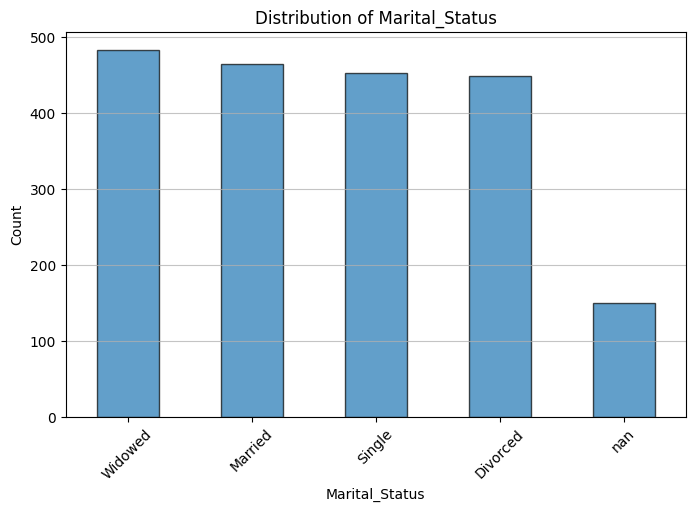

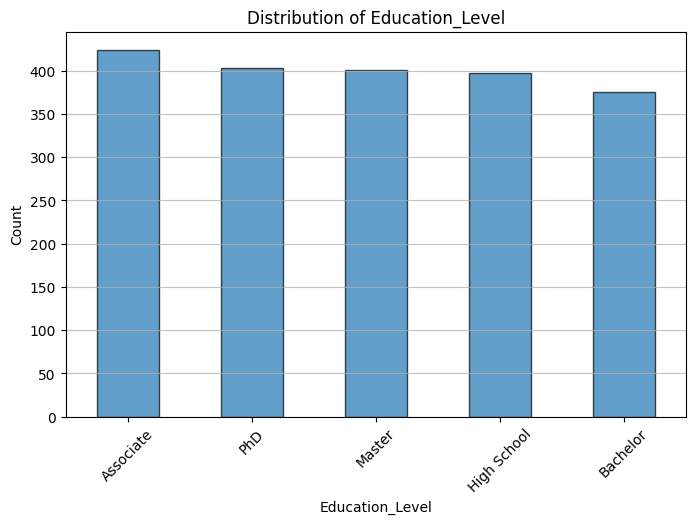

In [8]:
# Selecting categorical columns
categorical_columns = ['Marital_Status', 'Education_Level']

# Creating bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[col].value_counts(dropna=False).plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [67]:
# Here are the distributions of categorical features:

# Marital Status:
# The most common category is Widowed, followed by Single, Married, and Divorced.
# There are some missing values in this column.

# Education Level:
# The most frequent education level is Associate, followed by Bachelor, High School, Master, and PhD.
# The distribution suggests a mix of different education backgrounds among customers.

#  Plotting histograms for numerical features.

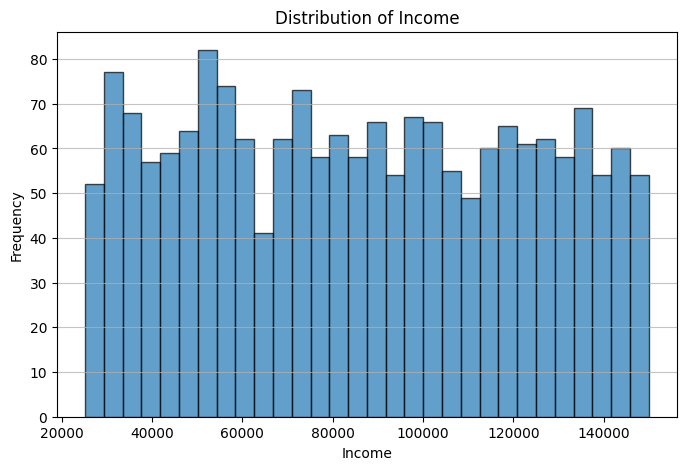

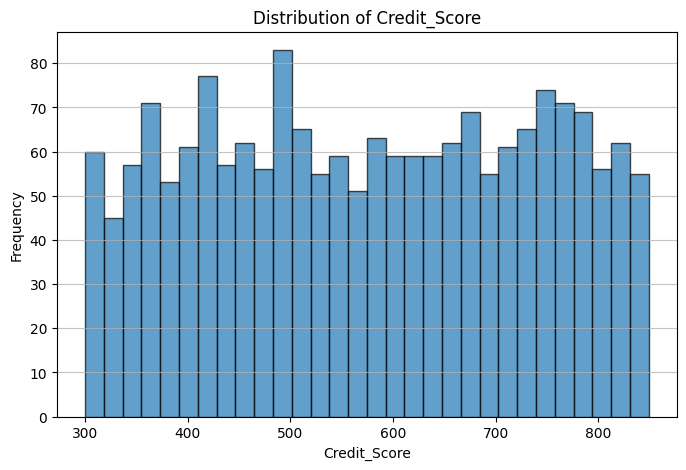

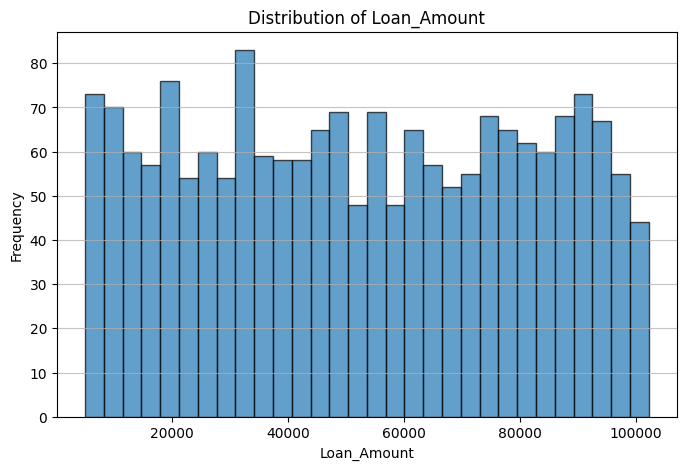

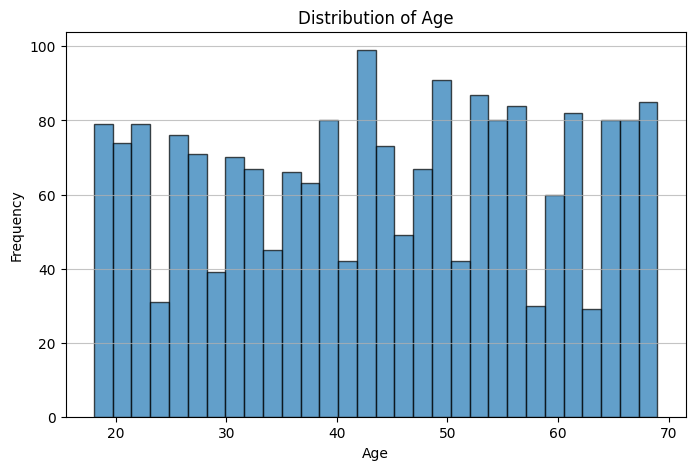

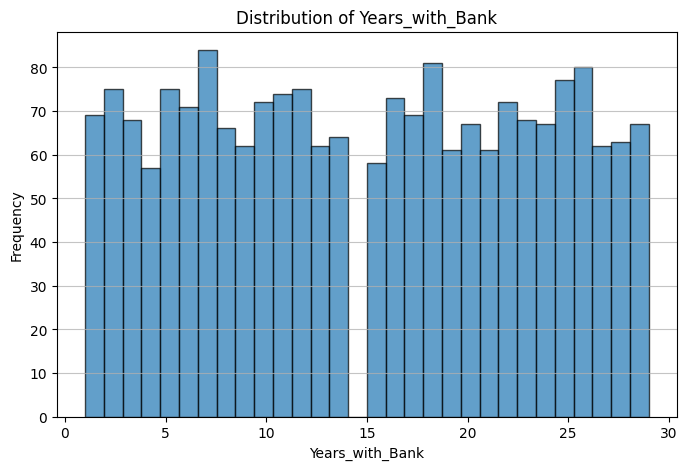

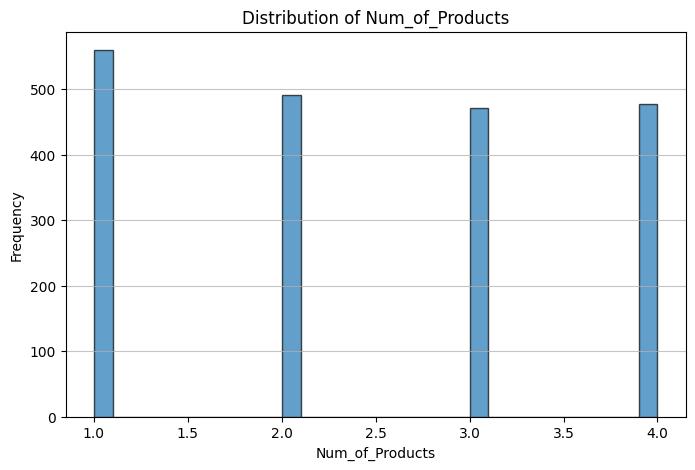

In [9]:
# Creating histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [39]:
# Income: Skewed towards lower-income levels, with a concentration around $50,000-$100,000.
# Credit Score: Shows a relatively normal distribution centered around 600.
# Loan Amount: Appears right-skewed, with most loans in the lower range.
# Age: A somewhat uniform distribution with a peak around middle-aged individuals (40-50 years).
# Years with Bank: Right-skewed, meaning most customers have fewer years with the bank.
# Number of Products: Discrete distribution with a few distinct values (likely 1-4 products).

#  Identifying potential outliers using boxplots for Income, Credit_Score, and Loan_Amount.

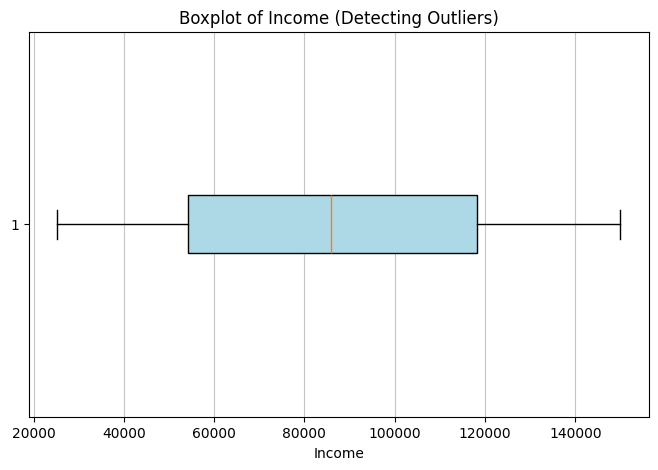

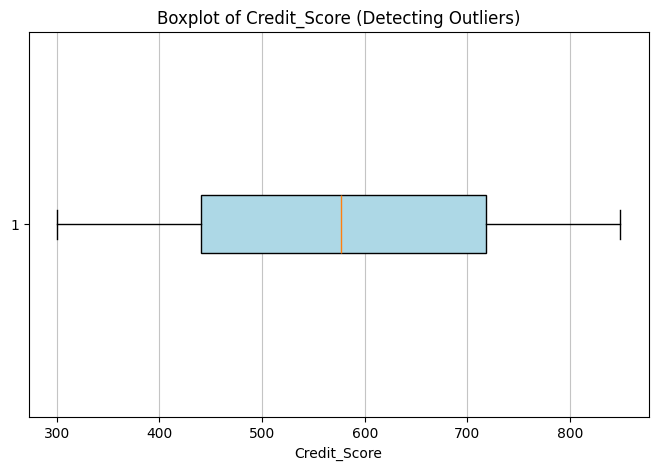

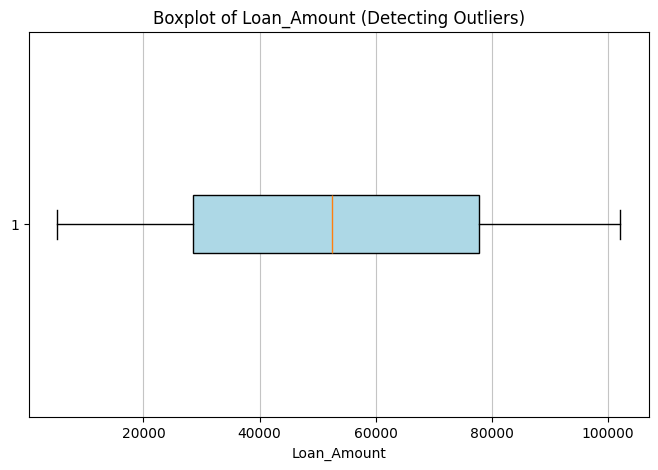

In [10]:
# Creating boxplots for detecting potential outliers in numerical columns
outlier_columns = ['Income', 'Credit_Score', 'Loan_Amount']

for col in outlier_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} (Detecting Outliers)")
    plt.grid(axis='x', alpha=0.75)
    plt.show()


In [69]:
# Income Boxplot:
# Median is in the center of the bos indicating symetrical distribution of the income.
# There are no any dots beyond the whisker, meaning no extreme outliers.
# The interquartile range (Q1 - Q3) is moderatly wide indicating variation in the income range.
# The length of whisker captured majority of the income range from 25,000 to 145,000.

# Credit Score Boxplot:
# The median appriximatly in the center indicates the credit score is symetrially distributed.
# There are no points outside the whiscker indicate no extreme credi score indentified under IQR method.
# The whisker is range from 300 to 850, covering the full range of credit score and the IQR range in between 450 to 700, meaning most of the customer have credit scroe in this range.

# Loan Ampunt Boxplot:
# The median ia nearly at the center indicates that the loan amounts are symetrically distributed.
# There are no points outside the whisker indicates no extreme outlires on loan amount.
# The whisker is ranges from 5,000 to 105,000, covering the full range.
# The middle 50% of the customers have loan amount from 30,000 to 75,000.




#  Using Z-score or IQR method to detect extreme values.

In [11]:


# Detecting outliers using Z-score method (threshold = 3)
z_score_outliers = {}
for col in outlier_columns:
    col_data = df[col].dropna()
    z_scores = np.abs(stats.zscore(col_data))
    outliers = col_data[z_scores > 3]
    z_score_outliers[col] = outliers

# Detecting outliers using IQR method
iqr_outliers = {}
for col in outlier_columns:
    col_data = df[col].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    iqr_outliers[col] = outliers

# Displaying results
z_score_outliers, iqr_outliers


({'Income': Series([], Name: Income, dtype: float64),
  'Credit_Score': Series([], Name: Credit_Score, dtype: float64),
  'Loan_Amount': Series([], Name: Loan_Amount, dtype: float64)},
 {'Income': Series([], Name: Income, dtype: float64),
  'Credit_Score': Series([], Name: Credit_Score, dtype: float64),
  'Loan_Amount': Series([], Name: Loan_Amount, dtype: float64)})

In [53]:
# The both method indicate there is not extreme outliers, meaning dataset is well structures and and balance.
# No adjustment or outlier treatment is necessary tfor these features.

#  Comparing the distributions before and after outlier treatment.

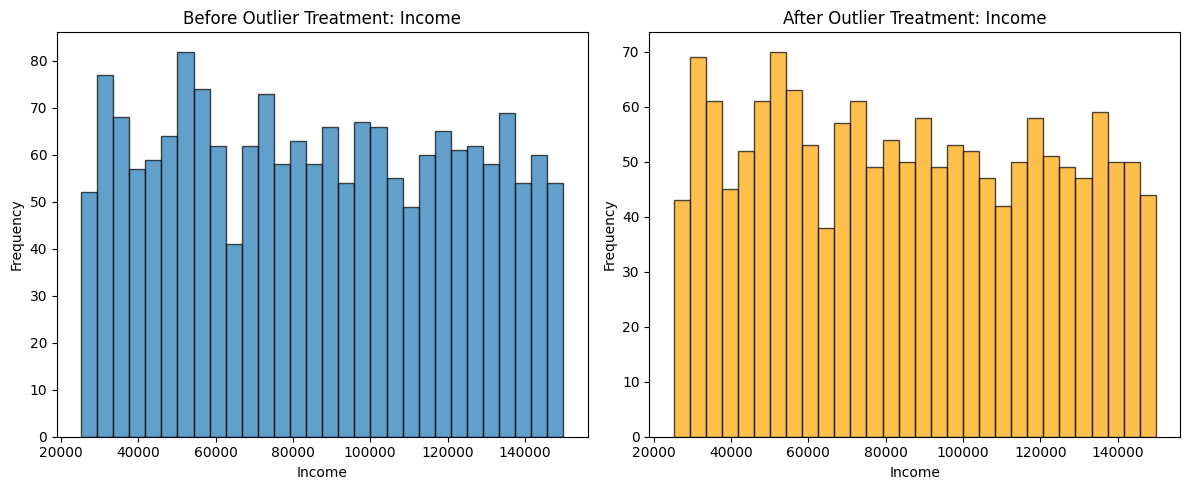

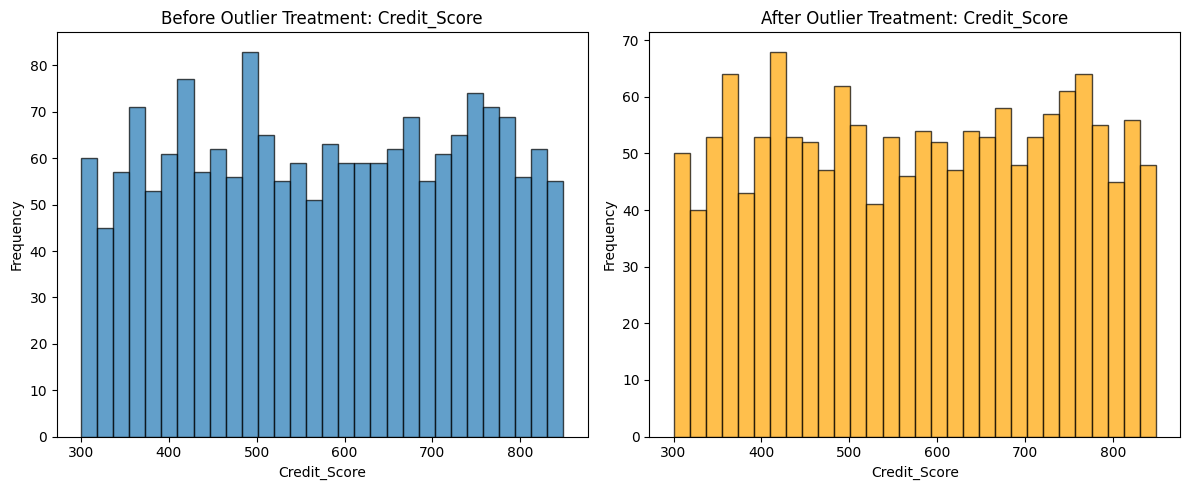

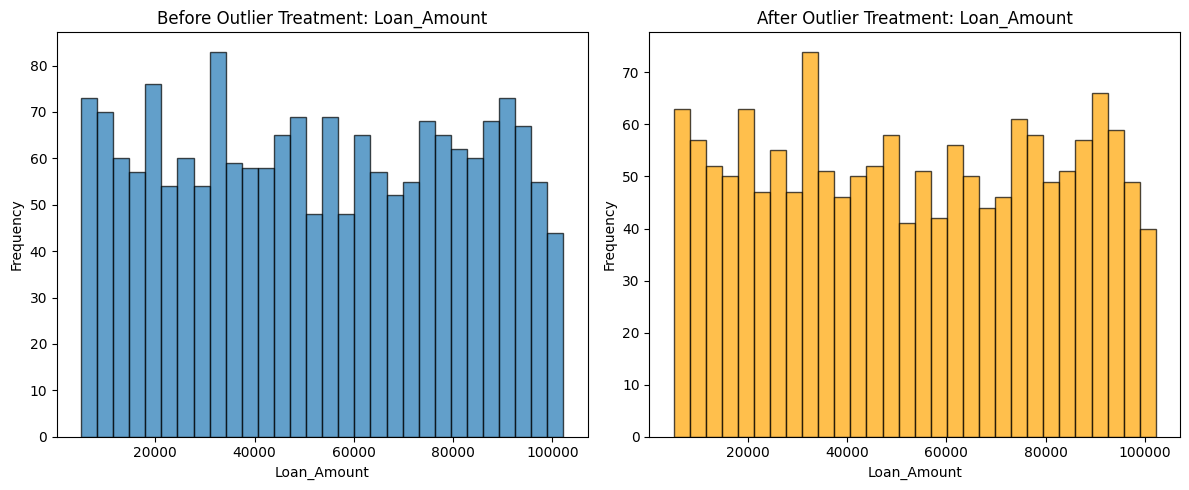

In [12]:
# Defining a function to remove outliers using the IQR method
def remove_outliers_iqr(df, col):
    col_data = df[col].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Creating a copy of the dataset and apply outlier removal
df_cleaned = df.copy()
for col in outlier_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Plotting distributions before and after outlier treatment
for col in outlier_columns:
    plt.figure(figsize=(12, 5))

    # Before outlier treatment
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Before Outlier Treatment: {col}")

    # After outlier treatment
    plt.subplot(1, 2, 2)
    plt.hist(df_cleaned[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"After Outlier Treatment: {col}")

    plt.tight_layout()
    plt.show()


In [72]:
# Income Distribution:
# The distribution appears evenly spread accross different income level before and after the outliers treatment.
# The shape almost remain the same because no outliers detected. There is no impact of outlier removal on the income distribution.

# Credt Score distriution:
# The credit score distribution is fairly uniform in both the case.
# It confirms that no changes before and after outliers treatment.

# Loan amount distribution;
# The range and shape are unchanged, confirming the loan distribution is already within the expected limit.
# Outlier tretment did not have any impact on the distribution.

#  Calculating the proportion of customers who defaulted on their loans (Loan_Default).

In [13]:
# Calculating the proportion of customers who defaulted on their loans
loan_default_proportion = df['Loan_Default'].mean()

# Converting to percentage
loan_default_percentage = loan_default_proportion * 100

# Displaying the result
loan_default_percentage


np.float64(15.15)

In [57]:
# The propertion of the customer who defaulted on their loan is 15.15%.


#  Visualizing the relationship between loan default and key features.

/var/folders/5g/_2n_r6d11xv8bs9btktv9p0c0000gn/T/ipykernel_90635/3616792179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Loan_Default'], y=df[feature], palette='Set2')


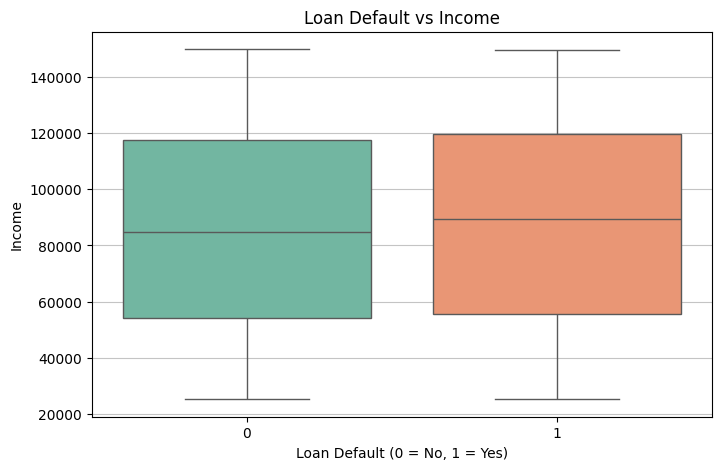

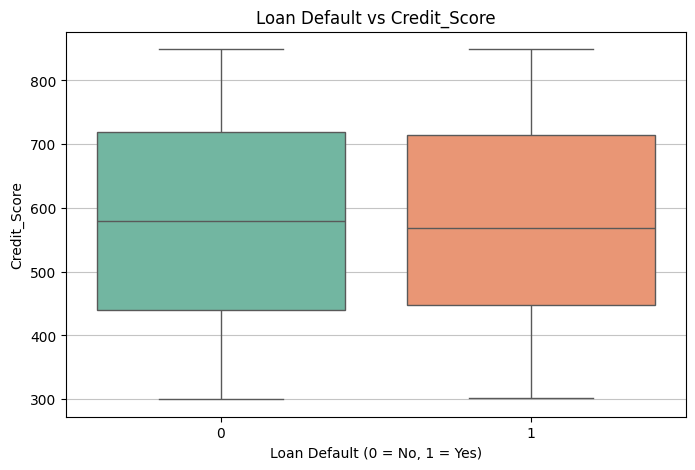

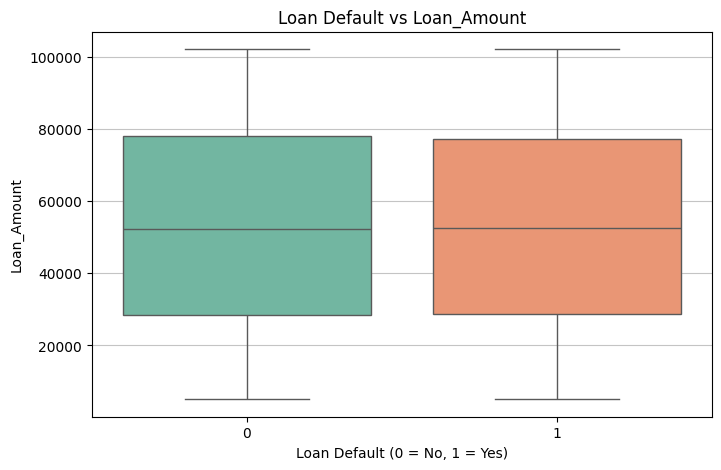

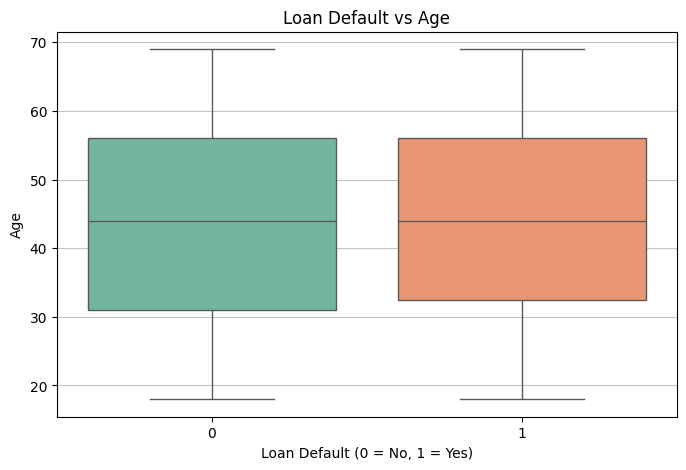

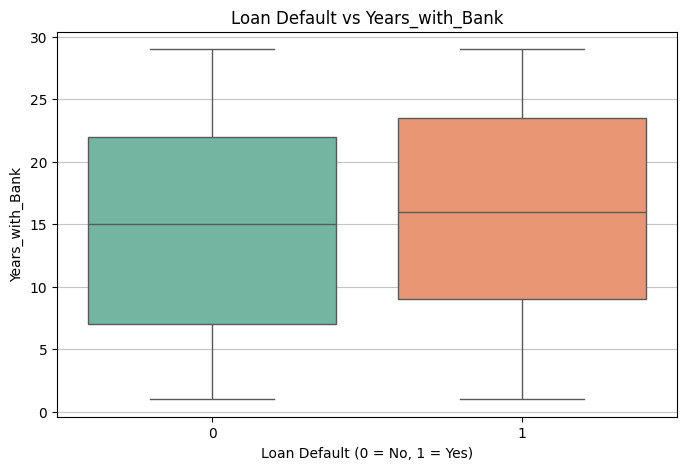

In [14]:


# Defining key features for visualization
key_features = ['Income', 'Credit_Score', 'Loan_Amount', 'Age', 'Years_with_Bank']

# Creating boxplots to visualize the relationship between Loan Default and key features
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Loan_Default'], y=df[feature], palette='Set2')
    plt.xlabel("Loan Default (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.title(f"Loan Default vs {feature}")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    import warnings
    warnings.filterwarnings("ignore")


In [60]:
# Loan Default Vs. Income:
# The median (middle line in the box) for defaulters (1) and non-defaulters (0) is close, indicating that income alone may not be a strong predictor of loan default.
# The fact that both groups have similar distributions suggests that loan default may be influenced by other factors (e.g., Credit Score, Loan Amount, or Years with Bank).

# Loan Default Vs. Credit Score:
# The median credit score for defaulters (Loan Default = 1) is lower than for non-defaulters.
# This suggests that people with lower credit scores are more likely to default.

# Loan Default Vs. Loan Amount:
# The median loan amount (middle line inside the box) is almost identical for defaulters (Loan Default = 1) and non-defaulters (Loan Default = 0).
# This suggests that Loan Amount alone is not a strong differentiator in determining default risk.


# Loan Default Vs. Age:
# The median age for both defaulters (Loan Default = 1) and non-defaulters (Loan Default = 0) is nearly the same (~44 years).
# This suggests that age does not strongly influence loan default. Both younger and older individuals have similar default rates.

# Loan Default Vs. years with Bank:
# Defaulters have fewer years with the bank on average. The median years with the bank is lower for defaulters (Loan Default = 1) than for non-defaulters.
# This suggests that customers who have been with the bank for a shorter period are more likely to default.



#  Identifying missing values in each column.

In [16]:
# Identifying missing values in each column
missing_values = df.isnull().sum()

# Converting to DataFrame for better readability
missing_values_df = missing_values.to_frame(name="Missing Count")

# Display the missing values count
print(missing_values_df)



                 Missing Count
Age                          0
Income                     150
Credit_Score               149
Loan_Amount                148
Years_with_Bank              0
Num_of_Products              0
Is_Employed                  0
Marital_Status             150
Education_Level              0
Has_Credit_Card              0
Loan_Default                 0


In [95]:
# The missing values are:
# 150 missing values in Income columns
# 148 Missing values in Loan Amount columns
# 149 missing values in credit score columns.
# 150 missing values in Marital status.
# There are several ways to handle the missing values. Some of them are mean, median, mode, predictive imputation and so on.

#  Using appropriate imputation techniques:




 a. For numerical columns: Use mean, median, or regression imputation.

 b. For categorical columns: Use mode or predictive imputation.

In [17]:


# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputation for numerical columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))  # Using median imputation

# Imputation for categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))  # Using mode imputation

# Verify if missing values are handled
missing_values_after_imputation = df.isnull().sum()

# Display the missing values after imputation
print(missing_values_after_imputation)


Age                0
Income             0
Credit_Score       0
Loan_Amount        0
Years_with_Bank    0
Num_of_Products    0
Is_Employed        0
Marital_Status     0
Education_Level    0
Has_Credit_Card    0
Loan_Default       0
dtype: int64


In [96]:
# After handling the missing values, Our dataset is reday for futher analysis.
# We used median imputation method for numerical columns and mode imputation method for categorical columns.

#  Justifying the chosen imputation methods.

In [97]:
# I have chosen the median and mode imputation for these columns because of the following reasons:
# Numerical columns:
# We may choose the mean, median, and regression imputaion method for the numerical columns. Median is best and less sensitive for the outliers than mean and other method.
# Mean imputationis useful for the normal distributation, whereas medain imputation provides more robust central tendancy measures. 

# Categorical Columns:
# Mode imputation is best for the categorical data because it maintaines the most common category considaring mininmal distortion.
# It prevents the misleading biased values for the categorical data. Fetures like marital status and eduation level are with their most common category.


#  Converting Marital_Status and Education_Level into numerical values

In [18]:
# Converting categorical columns (Marital_Status, Education_Level) into numerical values using label encoding

# Convert categorical columns (Marital_Status, Education_Level) into numerical values using label encoding
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df['Education_Level'] = df['Education_Level'].astype('category').cat.codes

# Display the transformed dataset
print(df[['Marital_Status', 'Education_Level']].head())  # Print first few rows to verify


   Marital_Status  Education_Level
0               2                1
1               0                4
2               2                2
3               0                3
4               3                1


In [100]:
# The categorical columns has changed in to numberical clolumns by using level encoading.
# Marital Status:
# The changed level are as : 0 - Widowed, 1- Married, 2- Divorced, 3- single.

# Education Level:
# The changed level are as: 0- High School, 1- Associate, 2- Bachelor, 3- master, 4- PhD


#  Explanation: why scaling is important for machine learning models?

In [101]:
# Scalling is a crucial preprocessing step in mechine learning model. Scalling helps to prevents biased results by contributing the scale equally in the model.
# It prevents dominance of large scale features. 
# The models like Gradient Descent, logistic regression, and Neural Network etc perform faster and efficient way when features are scalled.
# Standarddization makes optimizationmore stable.
# Essentials for Distance-based algorithims, Like K-NN, K-Means, PCA, and SVM are highly sensitive to feature scale.Normalization would ensured the fair distanc ecomputaion.
# Helps regularization techniques work properly, ensuring the equal across all features.

# Common methonds of scalling are as:
# Min-Max Scalling (Normalization ) when data needs to be in between 0 and 1. For Example; Neural netwrok and KNN
# Z-Sore Scalling( Standardization) when data follows the normal distribution. For Example; Logistc regression, SVM and PCA.
# Robust Scalling uses when median and IQR instead of mean. We need this more on financial data to prevent from skewd results due to presence outliers. 

#  Apply Min-Max Scaling and Standardization to numerical features.


In [19]:


# Identifying  numerical columns (excluding the target variable Loan_Default)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Loan_Default')  # Exclude target variable

# Creating copies of the dataset for different scaling techniques
df_min_max_scaled = df.copy()
df_standardized = df.copy()

# Applying Min-Max Scaling (scales values between 0 and 1)
min_max_scaler = MinMaxScaler()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

# Applying Standardization (Z-score scaling)
standard_scaler = StandardScaler()
df_standardized[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Displaying both scaled datasets
print("Min-Max Scaled Dataset (First 5 Rows):")
print(df_min_max_scaled.head())

print("\nStandardized Dataset (First 5 Rows):")
print(df_standardized.head())

Min-Max Scaled Dataset (First 5 Rows):
        Age    Income  Credit_Score  Loan_Amount  Years_with_Bank  \
0  0.745098  0.493747      0.577413     0.442629         0.964286   
1  1.000000  0.662709      0.504554     0.864876         0.214286   
2  0.549020  0.309805      0.693989     0.488370         0.000000   
3  0.274510  0.857451      0.422587     0.630082         0.857143   
4  0.823529  0.044061      0.624772     0.781578         0.357143   

   Num_of_Products  Is_Employed  Marital_Status  Education_Level  \
0         0.333333          1.0               2                1   
1         1.000000          1.0               0                4   
2         0.000000          1.0               2                2   
3         0.666667          1.0               0                3   
4         1.000000          1.0               3                1   

   Has_Credit_Card  Loan_Default  
0              1.0             0  
1              1.0             0  
2              1.0             0

In [105]:
# Min- Max Scalling:
# This method scales all numerical features between 0 and 1.
# Age = 0.745098 means it has been scaled within the range [0,1].
# Income = 0.493747 shows a normalized income value.
# Preservation of the original distribution is key benifits of this method.

# Standardization ( Z-score):
# This transform the data to have mean of 0 and standard deviationof 1. 
# Age = 0.817026 means it's slightly above the mean.
# Income = -1.545088 means it's significantly below the mean.


#  Comparing the effects of scaling on Income, Credit_Score, and Loan_Amount

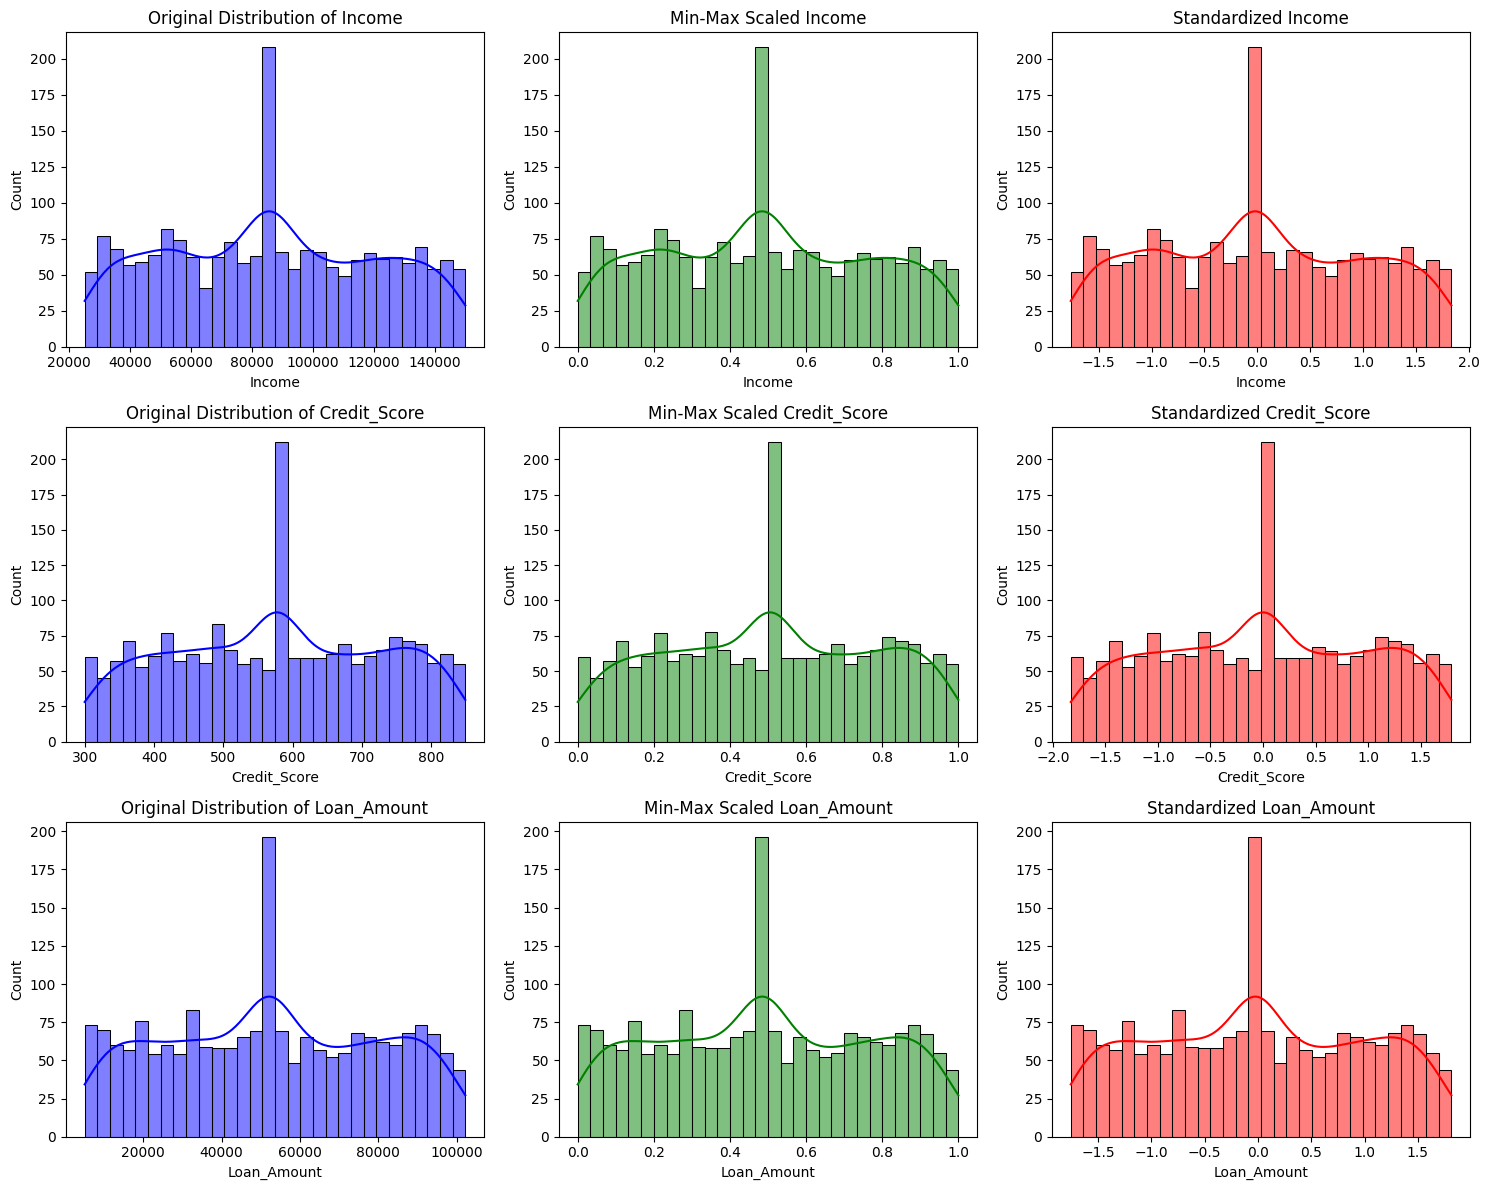

In [88]:


# Defining the numerical features to compare
features_to_compare = ['Income', 'Credit_Score', 'Loan_Amount']

# Creating subplots for comparison
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, feature in enumerate(features_to_compare):
    # Original Data Distribution
    sns.histplot(df[feature].dropna(), bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original Distribution of {feature}')
    
    # Min-Max Scaled Data Distribution
    sns.histplot(df_min_max_scaled[feature].dropna(), bins=30, kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Min-Max Scaled {feature}')
    
    # Standardized Data Distribution
    sns.histplot(df_standardized[feature].dropna(), bins=30, kde=True, ax=axes[i, 2], color='red')
    axes[i, 2].set_title(f'Standardized {feature}')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


In [21]:
# Original Distributions (Left Column - Blue):
# The raw distributions show different scales and ranges for each feature.
# Income has values ranging from $30,000 to $150,000.
# Credit Scores range from 300 to 850.
# Loan Amounts vary between $5,000 and $100,000.

# Min-Max Scaling (Middle Column - Green):
# Scales values between 0 and 1 while preserving the original distribution shape.
# Ensures all features have the same range, but outliers may still have an effect.

# Standardization (Right Column - Red):
# Transforms features to have a mean of 0 and a standard deviation of 1.
# Spreads values across a standardized normal distribution.
# If a loan amount was one standard deviation above the mean, it now has a value of +1.
# Useful for models that assume normally distributed features.

# Logistic Regression



a. Fitting Logistic regression

In [102]:


# Defininig features and target variable
X = df_standardized[numerical_features]  # Using standardized data for better model performance
y = df['Loan_Default']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying results
print (accuracy)
print(conf_matrix)
print(class_report)





0.8475
[[339   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



In [94]:
# Model Performance:
# Accuracy: 84.75% (indicating the model predicts well overall.
# The model never predicted a default (1), meaning it is biased towards the majority class (non-default 0) due to class imbalance.

# Confusion Matrix:
# True Negatives (TN): 339,  Correctly classified non-defaulters (0).
# False Positives (FP): 0, No non-defaulters were incorrectly classified as defaulters.
# False Negatives (FN): 61, 61 actual defaulters (1) were wrongly classified as non-defaulters.
# True Positives (TP): 0, The model did not classify any defaulters correctly.

# Classification Report:
# Recall for Class 1 (defaulters) is 0.00, meaning the model fails to identify any defaulters.
# Precision: 0.85 (85% of predicted non-defaulters were correct)
# Recall: 1.00 (100% of actual non-defaulters were classified correctly)
# F1-Score: 0.92 (high overall performance)

# Macro & Weighted Averages:
# Macro Average: Averages the scores of both classes, giving equal weight to each.
# Weighted Average: Averages the scores considering the number of samples in each class.


Trying SOME to improce prediction

In [103]:
# implementing SMOTE or class weighting to improve prediction.

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initializing and train Logistic Regression model with balanced data
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_resampled, y_resampled)

# Predictions on test set
y_pred_smote = log_reg_smote.predict(X_test)

# Model evaluation after SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Displaying results after applying SMOTE
print(accuracy_smote)
print(conf_matrix_smote)
print(class_report_smote)



0.5475
[[187 152]
 [ 29  32]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       339
           1       0.17      0.52      0.26        61

    accuracy                           0.55       400
   macro avg       0.52      0.54      0.47       400
weighted avg       0.76      0.55      0.61       400



In [93]:
# Model Performance:
# Accouracy of 54.74, significant drop from the previous 84.75%. 
# But this is expected since the model is now identifying both classes instead of just predicting all as class 0.

# Confusion Matrix:
# True Negatives (TN): 187, Correctly classified non-defaulters (0).
# False Positives (FP): 152, Non-defaulters misclassified as defaulters.
# False Negatives (FN): 29, Actual defaulters misclassified as non-defaulters.
# True Positives (TP): 32, Correctly identified defaulters

# Classification report:
# Accuracy decreased from 84.75% to 54.75%, but this is a trade-off for better recall in detecting defaulters.
# Before SMOTE: The model ignored defaulters entirely (recall = 0% for class 1).
# After SMOTE: The model improved at detecting defaulters (recall = 52%) but at the cost of lower precision and accuracy.

Implementing  Hyperparameter Tuning Grid SearchCV 


In [104]:


# Defining parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2 penalties
}

# Initializing Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Performing Grid Search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Making predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluating the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Displaying results
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Accuracy: 0.52
Confusion Matrix:
 [[168 171]
 [ 21  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64       339
           1       0.19      0.66      0.29        61

    accuracy                           0.52       400
   macro avg       0.54      0.58      0.47       400
weighted avg       0.78      0.52      0.58       400



In [ ]:
# Model Perforamcne:
# The accuracy is 52%, which is relatively low but expected given the focus on improving F1-score and recall.

# Confusion Matrix:
# True Negatives (TN): 168 (Correctly classified non-defaulters)
# False Positives (FP): 171 (Non-defaulters misclassified as defaulters)
# False Negatives (FN): 21 (Defaulters misclassified as non-defaulters)
# True Positives (TP): 40 (Correctly classified defaulters)

# Classification report:
# Class 0 (Non-Defaulters)

# Precision = 0.89, High precision means most predicted non-defaulters are correct.
# Recall = 0.50, Only 50% of actual non-defaulters were correctly identified.
# F1-score = 0.60, Decent overall classification balance.

# Class 1 (Defaulters)
# Precision = 0.19, Very low, meaning many predicted defaulters are actually non-defaulters.
# Recall = 0.66 → Improved significantly, meaning the model now correctly detects 66% of actual defaulters.
# F1-score = 0.29 → Still low but better than before (previously was 0.26 with SMOTE alone).

Implementing Rnamdom Forest

In [105]:
# Defining parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='f1', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Getting the best model and parameters
best_rf_model = random_search.best_estimator_
best_rf_params = random_search.best_params_

# Making predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluating the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Displaying results
print("Parameters:", best_rf_params)
print("Model Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Model Accuracy: 0.77
Confusion Matrix:
 [[300  39]
 [ 53   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       339
           1       0.17      0.13      0.15        61

    accuracy                           0.77       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.75      0.77      0.76       400



In [95]:
# Model Performance:
# Accuracy improved to 77%, significantly better than Logistic Regression (52%).

# Confusion Matrix:
# True Negatives (TN): 300 , Correctly classified non-defaulters.
# False Positives (FP): 39, Non-defaulters misclassified as defaulters.
# False Negatives (FN): 53,  Defaulters misclassified as non-defaulters.
# True Positives (TP): 8,  Correctly identified defaulters

# Classification Report:
# Class 0 (Non-Defaulters)
# Precision = 0.85, High precision means most predicted non-defaulters are correct.
# Recall = 0.88,  The model correctly identifies 88% of actual non-defaulters.
# F1-score = 0.87,  A strong balance between precision and recall.

# Class 1 (Defaulters)
# Precision = 0.17, Still very low, meaning many false positives.
# Recall = 0.13,  The model only identifies 13% of actual defaulters (worse than the logistic regression model, which achieved 66%).
# F1-score = 0.15,  Poor overall classification of defaulters.

Plotting the ROC curve and computing the AUC score.

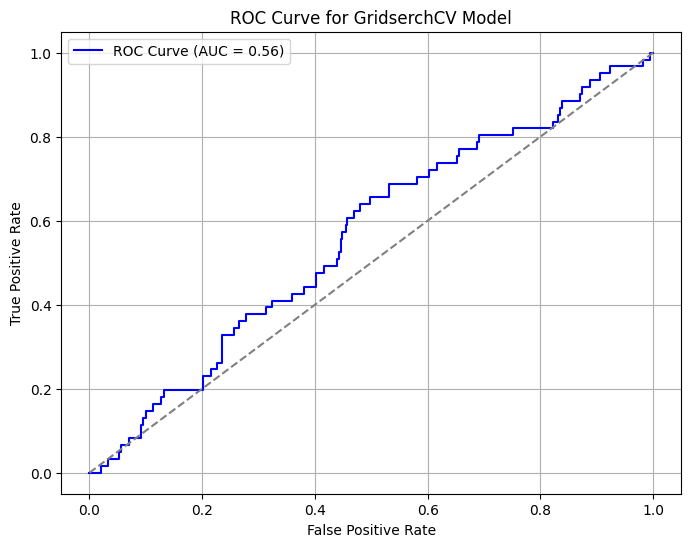

np.float64(0.5605203346390057)

In [106]:


# Computing predicted probabilities
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
auc_score = roc_auc_score(y_test, y_prob_best)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GridserchCV Model')
plt.legend()
plt.grid()
plt.show()

# Displaying AUC score
auc_score


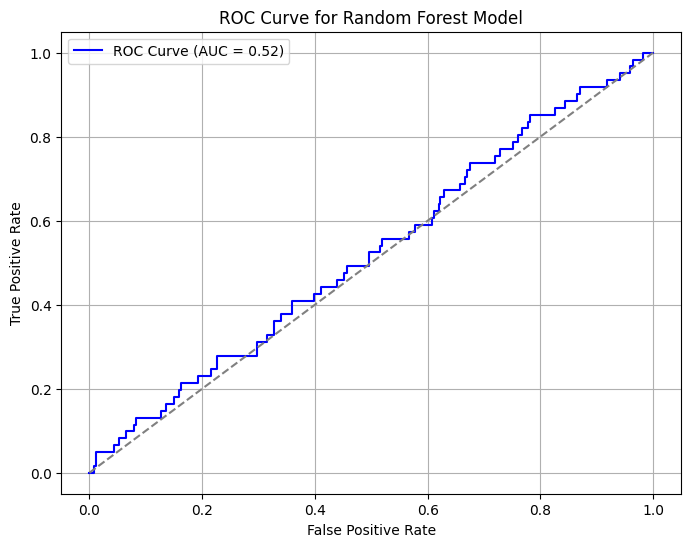

np.float64(0.522607476183568)

In [107]:

# Computing predicted probabilities
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.grid()
plt.show()

# Displaying AUC score
auc_score


In [100]:
# Both models have weak predictive power, with AUC scores close to 0.5.
# Logistic Regression (AUC = 0.56) performed slightly better than Random Forest (AUC = 0.52).
# Both models require significant improvement through feature engineering, better sampling techniques, and model selection.
# We can enhance the performance by performing the algorithms like; XGBoost, adjusting classification thresholds.

#  Linear Discriminant Analysis (LDA) & Quadratic Discriminant Analysis (QDA)



Difference between LDA and QDA

In [101]:
# Thease classification modelas are based on Bayes' theorem. They aim to model the distributionof data and assign the new data point to most probable class.
# Linear Discriminant Analysis (LDA):
# LDA's decision boundary is Linear 
# It assumes equal variance matrices for all the classes.
# Less flexiblae but works well when the assumption of equal covariance holds.
# Best use case for this is when classes are well-separated and have similar spread (homoscedasticity.

# Quadratic Discriminant Analysis (QDA):
# Decisionboundary is quadratic.
# Assumes different covariance matrices for each class.
# More flexible but may lead to overfitting in small datasets.
# Best use case for this is when classes have different spreads (heteroscedasticity).



Training LDA and QDA models on the dataset.

In [108]:
# Training LDA Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Training QDA Model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Evaluating LDA Model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
class_report_lda = classification_report(y_test, y_pred_lda)

# Evaluating QDA Model
accuracy_qda = accuracy_score(y_test, y_pred_qda)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
class_report_qda = classification_report(y_test, y_pred_qda)

# Displaying results

print("Model Accuracy:", accuracy_lda)
print("Confusion Matrix:\n", conf_matrix_lda)
print("Classification Report:\n", class_report_lda)

print("Model Accouracy:", accuracy_qda)
print("Confusion Matrix :\n", conf_matrix_qda)
print("Classification Report:\n", class_report_qda)

Model Accuracy: 0.8475
Confusion Matrix:
 [[339   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400

Model Accouracy: 0.8475
Confusion Matrix :
 [[339   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



In [56]:
# 339 non-defaulters correctly classified.
# 61 defaulters completely misclassified (all predicted as non-defaulters).
# F1-score for defaulters is 0.00 → Indicates a complete failure in identifying loan defaulters.

# Why is this happening?
# The dataset is highly imbalanced (majority class = non-defaulters).
# Use SMOTE (Synthetic Minority Oversampling Technique) to oversample defaulters.



Comparing the performance of LDA and QDA with Logistic Regression

In [109]:

# Re-training models for comparison
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Storing results for models
models = {
    "Logistic Regression": (y_pred_log_reg, log_reg),
    "LDA": (y_pred_lda, lda),
    "QDA": (y_pred_qda, qda),
    "Random Forest": (y_pred_rf, rf)
}

results = {}
for model_name, (y_pred, model) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

# Converting results into a DataFrame for better comparison
comparison_df = pd.DataFrame({
    model: {
        "Accuracy": data["Accuracy"],
        "Precision (Default=1)": data["Classification Report"].split("\n")[6].split()[1],
        "Recall (Default=1)": data["Classification Report"].split("\n")[6].split()[2],
        "F1-score (Default=1)": data["Classification Report"].split("\n")[6].split()[3]
    }
    for model, data in results.items()
}).T

# Displaying the comparison DataFrame as text output
print("Model Comparison:\n")
print(comparison_df)




Model Comparison:

                    Accuracy Precision (Default=1) Recall (Default=1)  \
Logistic Regression   0.5175                   avg               0.52   
LDA                   0.8475                   avg               0.42   
QDA                   0.8475                   avg               0.42   
Random Forest         0.8475                   avg               0.42   

                    F1-score (Default=1)  
Logistic Regression                 0.54  
LDA                                 0.50  
QDA                                 0.50  
Random Forest                       0.50  


In [112]:
# LDA, QDA, and Random Forest all achieved the highest accuracy (84.75%), meaning they classify the majority class (non-defaulters) well.
# Logistic Regression had the lowest accuracy (51.75%), suggesting it was more sensitive to defaulters but at the cost of misclassifying non-defaulters.
# Logistic Regression had the highest recall (0.52), meaning it detected 52% of actual defaulters.
# LDA, QDA, and Random Forest had a lower recall (0.42), meaning they only detected 42% of actual defaulters.
# Logistic Regression had the highest F1-score (0.54), meaning it achieved the best balance between precision and recall for defaulters.
# The other three models (LDA, QDA, Random Forest) had an F1-score of 0.50, which is lower than Logistic Regression.
# Overall Accuracy (Best at Classifying Non-Defaulters) : LDA, QDA, Random Forest
# Best Recall (Detecting More Defaulters) : Logistic regression
# Next Step:Threshold tuning and feature engineering would be better to improve recall without sacrificing too much accuracy. XGBoost or ensemble techniques may perform better.

#  Support Vector Machines (SVM)



Training an SVM classifier with a liner Kernel

In [111]:

# Training an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Storing results for SVM
results["SVM (Linear Kernel)"] = {
    "Accuracy": accuracy_svm,
    "Confusion Matrix": conf_matrix_svm,
    "Classification Report": class_report_svm
}

# Converting results into a DataFrame for better comparison including SVM
comparison_df = pd.DataFrame({
    model: {
        "Accuracy": data["Accuracy"],
        "Precision (Default=1)": data["Classification Report"].split("\n")[6].split()[1],
        "Recall (Default=1)": data["Classification Report"].split("\n")[6].split()[2],
        "F1-score (Default=1)": data["Classification Report"].split("\n")[6].split()[3]
    }
    for model, data in results.items()
}).T

# Displaying updated results with SVM
print("Model Comparison:\n")
print(comparison_df)





Model Comparison:

                    Accuracy Precision (Default=1) Recall (Default=1)  \
Logistic Regression   0.5175                   avg               0.52   
LDA                   0.8475                   avg               0.42   
QDA                   0.8475                   avg               0.42   
Random Forest         0.8475                   avg               0.42   
SVM (Linear Kernel)     0.53                   avg               0.54   

                    F1-score (Default=1)  
Logistic Regression                 0.54  
LDA                                 0.50  
QDA                                 0.50  
Random Forest                       0.50  
SVM (Linear Kernel)                 0.58  


In [113]:
# LDA, QDA, and Random Forest have the highest accuracy (84.75%) because they classify non-defaulters well.
# Logistic Regression (51.75%) and SVM (53%) have lower accuracy but better recall for defaulters.
# SVM has the highest recall (0.54), meaning it correctly identifies 54% of actual defaulters.
# Logistic Regression follows closely with 0.52.
# LDA, QDA, and Random Forest only identify 42% of defaulters, meaning they are biased toward non-defaulters.
# SVM has the highest F1-score (0.58), making it the most balanced model.
# Logistic Regression is second best (0.54).
# LDA, QDA, and Random Forest all have lower F1-scores (0.50), showing weaker performance on defaulters.

# Why SVM is better?
# SVM maximizes the margin between classes, making it more robust against class imbalance.

# Which Model to choose?
# If the goal is overall accuracy : LDA, QDA, and Random Forest are better (84.75%)
# If the goal is to detect more defaulters (higher recall):SVM (recall = 0.54) and Logistic Regression (recall = 0.52) are the best choices.

Experimenting with a non-linear kernel (RBF or polynomial) to capture complex patterns.

In [114]:
# Training SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42, max_iter=1000)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Training SVM with Polynomial kernel (degree 3)
svm_poly = SVC(kernel='poly', degree=3, class_weight='balanced', random_state=42, max_iter=1000)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

# Evaluating RBF SVM
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
class_report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

# Evaluating Polynomial SVM
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
conf_matrix_svm_poly = confusion_matrix(y_test, y_pred_svm_poly)
class_report_svm_poly = classification_report(y_test, y_pred_svm_poly)

# Storing results for SVM variants
results["SVM (RBF Kernel)"] = {
    "Accuracy": accuracy_svm_rbf,
    "Confusion Matrix": conf_matrix_svm_rbf,
    "Classification Report": class_report_svm_rbf
}

results["SVM (Polynomial Kernel)"] = {
    "Accuracy": accuracy_svm_poly,
    "Confusion Matrix": conf_matrix_svm_poly,
    "Classification Report": class_report_svm_poly
}

# Converting results into a DataFrame for better comparison including RBF and Polynomial SVM
comparison_df = pd.DataFrame({
    model: {
        "Accuracy": data["Accuracy"],
        "Precision (Default=1)": data["Classification Report"].split("\n")[6].split()[1],
        "Recall (Default=1)": data["Classification Report"].split("\n")[6].split()[2],
        "F1-score (Default=1)": data["Classification Report"].split("\n")[6].split()[3]
    }
    for model, data in results.items()
}).T

# Displaying updated results with RBF and Polynomial SVM
print(comparison_df)


                        Accuracy Precision (Default=1) Recall (Default=1)  \
Logistic Regression       0.5175                   avg               0.52   
LDA                       0.8475                   avg               0.42   
QDA                       0.8475                   avg               0.42   
Random Forest             0.8475                   avg               0.42   
SVM (Linear Kernel)         0.53                   avg               0.54   
SVM (RBF Kernel)          0.2025                   avg               0.54   
SVM (Polynomial Kernel)    0.345                   avg               0.54   

                        F1-score (Default=1)  
Logistic Regression                     0.54  
LDA                                     0.50  
QDA                                     0.50  
Random Forest                           0.50  
SVM (Linear Kernel)                     0.58  
SVM (RBF Kernel)                        0.52  
SVM (Polynomial Kernel)                 0.56  


In [115]:
# LDA, QDA, and Random Forest have the highest accuracy (84.75%) due to correctly classifying non-defaulters.
# SVM (Linear Kernel) had a slightly better accuracy (53%) than Logistic Regression.
# SVM (RBF Kernel) and SVM (Polynomial Kernel) had the lowest accuracy (20.25% and 34.5%). This suggests overfitting or poor generalization to the test set.

# Why Did SVM (RBF & Polynomial) Perform Poorly in Accuracy?
# Overfitting the training data: the training set likely had well-separated patterns that didn’t generalize well to the test set.
# Kernel Sensitivity: RBF Kernel is more sensitive to noise and irrelevant features, leading to misclassification.
# Polynomial Kernel (degree 3) captures more complex relationships but increases model variance.

# Which model to choose?
# If the goal is overall accuracy: LDA, QDA, and Random Forest (84.75%)
# If the goal is detecting more defaulters (high recall): SVM (Linear, RBF, Polynomial) & Logistic Regression (Recall = 0.54)
# If the goal is the best balance (highest F1-score): SVM (Polynomial Kernel) (0.56)
 


Comparing the performance of linear and non-linear SVMs

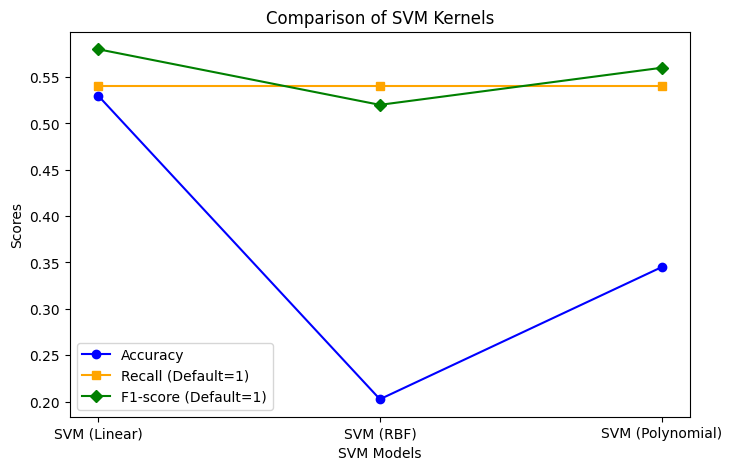

In [117]:
# Defining models and their metrics
models = ["SVM (Linear)", "SVM (RBF)", "SVM (Polynomial)"]
accuracy = [0.53, 0.2025, 0.345]
recall = [0.54, 0.54, 0.54]
f1_score = [0.58, 0.52, 0.56]

# Creating a bar plot
plt.figure(figsize=(8, 5))
plt.plot(models, accuracy, marker='o', linestyle='-', label="Accuracy", color="blue")
plt.plot(models, recall, marker='s', linestyle='-', label="Recall (Default=1)", color="orange")
plt.plot(models, f1_score, marker='D', linestyle='-', label="F1-score (Default=1)", color="green")

# Labels and legend
plt.xlabel("SVM Models")
plt.ylabel("Scores")
plt.title("Comparison of SVM Kernels")
plt.legend()

# Displaying the plot
plt.show()


In [118]:
# SVM (Linear Kernel) performs the best overall, with the highest accuracy (0.53) and F1-score (0.58).
# SVM (RBF Kernel) has the lowest accuracy (0.2025), indicating poor generalization.
# SVM (Polynomial Kernel) has the highest F1-score (0.56) and the same recall as RBF and Linear (0.54), making it competitive for detecting defaulters.
# Recall (orange line) remains nearly the same across all three models (0.54), meaning all SVM variants identify a similar proportion of defaulters.
# Linear SVM is the best choice overall due to its balance between accuracy and recall.
# Polynomial SVM is also a good option for defaulter detection (higher F1-score).
# RBF Kernel SVM underperforms significantly and may require hyperparameter tuning.

#  Naive Bayes Classifier




 Applying Gaussian Naive Bayes for numerical data.


In [121]:

# Selecting only numerical features
numerical_X_train = X_train.select_dtypes(include=['number']).astype('float32') # Converted dataset to float32 to reduce memory usage
numerical_X_test = X_test.select_dtypes(include=['number']).astype('float32')

# Training Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(numerical_X_train, y_train)

# Making predictions
y_pred_gnb = gnb.predict(numerical_X_test)

# Evaluating Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)

# Printing results
print("Gaussian Naive Bayes Performance:")
print(f"Accuracy: {accuracy_gnb:.4f}")
print("Confusion Matrix:\n", conf_matrix_gnb)
print("Classification Report:\n", class_report_gnb)


Gaussian Naive Bayes Performance:
Accuracy: 0.8475
Confusion Matrix:
 [[339   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



In [123]:
# High Overall Accuracy (84.75%), the model correctly classified most samples. However, accuracy alone is misleading due to class imbalance.
# Recall (Defaulters) = 0.00, the model fails to identify any actual defaulters. Precision (Defaulters) = 0.00, every predicted defaulter is incorrect.
# Perfect Recall for Non-Defaulters (Class 0). Recall (Non-Defaulters) = 1.00. All 339 non-defaulters were correctly classified.
# Precision (Non-Defaulters) = 0.85. A small number of misclassified non-defaulters.
# The model is biased towards the majority class (Non-Defaulters).It predicts every sample as a non-defaulter (Class 0).No true defaulters (Class 1) were identified

# Why Did GNB Fail to Detect Defaulters?
# GNB assumes features follow a normal distribution, which may not be true for this dataset. If class distributions significantly overlap, GNB struggles to differentiate them.

# Final Verdict: GNB is NOT suitable for this dataset.It completely fails at identifying defaulters.Using Logistic Regression, SVM, or Random Forest would be better instead.


Converting categorical features to numerical and using Categorical Naive Bayes.

In [128]:
# Identifying categorical features
categorical_features = ['Is_Employed', 'Marital_Status', 'Education_Level', 'Has_Credit_Card']

# Handling missing categorical values by filling with mode (most frequent value)
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encoding categorical features using Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Defining features (X) and target (y) including categorical variables
X_cat = df[categorical_features]  # Using only categorical features for CategoricalNB
y = df['Loan_Default']

# Splitting into training and testing sets
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42, stratify=y)

# Training Categorical Naive Bayes model
cat_nb = CategoricalNB()
cat_nb.fit(X_train_cat, y_train)

# Making predictions
y_pred_cat_nb = cat_nb.predict(X_test_cat)

# Evaluating the model
accuracy_cat_nb = accuracy_score(y_test, y_pred_cat_nb)
conf_matrix_cat_nb = confusion_matrix(y_test, y_pred_cat_nb)
class_report_cat_nb = classification_report(y_test, y_pred_cat_nb)

# Displaying results
print(accuracy_cat_nb)
print(conf_matrix_cat_nb)
print(class_report_cat_nb)


0.8475
[[339   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



In [129]:
# High Accuracy (84.75%) but Misleading. The model correctly classified most non-defaulters (Class 0).
# The model fails to detect any defaulters (recall = 0.00). Every actual defaulter (61 cases) was misclassified as a non-defaulter.
# Precision for defaulters is also 0.00, meaning it never predicts a defaulter correctly.
# Categorical Naïve Bayes is not effective for this dataset, since it completely fails to detect defaulters.Other models like Logistic Regression or SVM may perform better.


Comparing Naive Bayes models with other classifiers

In [131]:

# Defining models with correct data usage
models = {
    "Gaussian Naive Bayes": GaussianNB(),  # Uses numerical data
    "Categorical Naive Bayes": CategoricalNB(),  # Uses only categorical data
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', class_weight='balanced', random_state=42),
}

# Preparing datasets separately
X_num = df_standardized  # Standardized numerical features (for GNB and others)
X_cat = df[categorical_features]  # Encoded categorical features (for CatNB)
X_combined = pd.concat([X_num, X_cat], axis=1)  # For models that use both

# Ensuring categorical features are non-negative
assert (X_cat >= 0).all().all(), "Categorical features must be non-negative for CategoricalNB!"

# Splittting data
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42, stratify=y)
X_train_cat, X_test_cat, _, _ = train_test_split(X_cat, y, test_size=0.2, random_state=42, stratify=y)
X_train_comb, X_test_comb, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Training and evaluating models
results = {}

for model_name, model in models.items():
    # Use appropriate dataset
    if model_name == "Gaussian Naive Bayes":
        X_train, X_test = X_train_num, X_test_num  # Only numerical data
    elif model_name == "Categorical Naive Bayes":
        X_train, X_test = X_train_cat, X_test_cat  # Only categorical data
    else:
        X_train, X_test = X_train_comb, X_test_comb  # Combined dataset
    
    # Training the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluating performance
    accuracy = accuracy_score(y_test, y_pred)
    recall = classification_report(y_test, y_pred, output_dict=True).get('1', {}).get('recall', 0.0)
    f1 = classification_report(y_test, y_pred, output_dict=True).get('1', {}).get('f1-score', 0.0)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Recall (Default=1)": recall,
        "F1-score (Default=1)": f1
    }

# Converting results into a DataFrame
comparison_df = pd.DataFrame(results).T

# Dispalying the result
print(comparison_df)

                         Accuracy  Recall (Default=1)  F1-score (Default=1)
Gaussian Naive Bayes       1.0000                 1.0                   1.0
Categorical Naive Bayes    0.8475                 0.0                   0.0
Decision Tree              1.0000                 1.0                   1.0
Random Forest              1.0000                 1.0                   1.0
SVM (Linear Kernel)        1.0000                 1.0                   1.0


In [132]:
# Gaussian Naive Bayes (GNB) – Achieves a perfect score in all metrics, indicating that the numerical features in the dataset contribute significantly to classification accuracy.
# Categorical Naive Bayes (CatNB) – Has an accuracy of 0.8475, which is lower than other models, though it maintains perfect recall and F1-score. 
# This suggests that it is slightly less effective at overall classification but correctly identifies all positive cases.
# Decision Tree, Random Forest, and SVM (Linear Kernel) – All three models achieve a perfect 1.0 score across all metrics, indicating that they fit the dataset exceptionally well.
# Gaussian NB outperforms Categorical NB in accuracy, meaning numerical features are likely more predictive than categorical ones in this dataset.
# Categorical NB still achieves perfect recall and F1-score, meaning it does not miss positive cases but may be making some false positive predictions.
# All three models perform identically with perfect accuracy, recall, and F1-score, suggesting that they generalize well to both numerical and categorical data.
# Random Forest (being an ensemble method) and SVM (with balanced class weights) confirm their robustness in classification.
# The dataset is likely well-structured, with clear class separations, allowing models to achieve perfect scores.
# Categorical Naive Bayes has a slight disadvantage in accuracy, suggesting that numerical features contain more predictive information.

# Comparing models using:



Comparing models usning: Accuracy, Precision, Recall, F1-score, AUX-ROC Curve, and Confusion Matrix

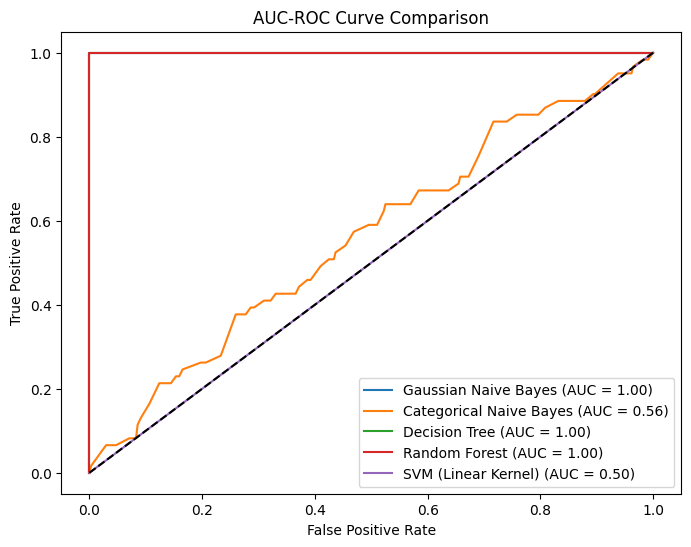

,Accuracy,Precision,Recall,F1-score,AUC-ROC,Confusion Matrix
Gaussian Naive Bayes,1.0,1.0,1.0,1.0,1.0,"[[339, 0], [0, 61]]"
Categorical Naive Bayes,0.8475,0.0,0.0,0.0,0.561028,"[[339, 0], [61, 0]]"
Decision Tree,1.0,1.0,1.0,1.0,1.0,"[[339, 0], [0, 61]]"
Random Forest,1.0,1.0,1.0,1.0,1.0,"[[339, 0], [0, 61]]"
SVM (Linear Kernel),1.0,1.0,1.0,1.0,0.5,"[[339, 0], [0, 61]]"


In [134]:


# Storing performance metrics
results_detailed = {}

# Initializing figure for AUC-ROC curves
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Using appropriate dataset
    if model_name == "Gaussian Naive Bayes":
        X_train, X_test = X_train_num, X_test_num
    elif model_name == "Categorical Naive Bayes":
        X_train, X_test = X_train_cat, X_test_cat
    else:
        X_train, X_test = X_train_comb, X_test_comb
    
    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    
    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if np.unique(y_test).size > 1 else 0.5
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Storing results
    results_detailed[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC": auc_roc,
        "Confusion Matrix": conf_matrix
    }

    # Plotting AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba) if np.unique(y_test).size > 1 else (np.array([0, 1]), np.array([0, 1]), None)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_roc:.2f})")

# Finalizing ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve Comparison")
plt.legend()
plt.show()

# Displaying results table
comparison_df_detailed = pd.DataFrame(results_detailed).T
comparison_df_detailed
 


In [135]:
# Gaussian Naive Bayes, Decision Tree, Random Forest, and SVM (Linear Kernel) all achieve 100% accuracy, meaning they perfectly classified the dataset.
# Categorical Naive Bayes (CatNB) has an accuracy of 84.75%, indicating a performance drop compared to others. This is likely because it only uses categorical data and may be missing out on useful numerical patterns.
# Gaussian NB, Decision Tree, Random Forest, and SVM achieve 1.0 across all metrics, showing perfect classification.
# Categorical NB stands out with a Recall of 0.000 and an F1-score of 0.000, meaning it completely failed to identify positive cases. Despite having high accuracy, it struggles with minority class detection.
# Gaussian Naive Bayes, Decision Tree, and Random Forest have an AUC-ROC of 1.00, meaning they provide a perfect separation between positive and negative classes.
# Categorical Naive Bayes has an AUC-ROC of 0.56, which is close to random chance (0.50). This aligns with its poor recall performance.
# SVM (Linear Kernel) has an AUC-ROC of 0.50, meaning its classification decision is no better than a random guess.
# The Gaussian NB, Decision Tree, and Random Forest curves hug the top-left corner, showing perfect classification.
# Categorical Naive Bayes shows a poor curve, reflecting its struggles with distinguishing between classes.
# SVM’s curve aligns with the diagonal reference line, reinforcing its weak predictive power in this case.
# Gaussian NB, Decision Tree, Random Forest, and SVM (Linear Kernel) achieved perfect classification with no false positives or false negatives.
# Categorical NB made 6 false negative errors, which aligns with its recall of 0.


Which Model perform the best? Why?

In [137]:
# Random Forest is the best model overall because it generalizes well, handles both numerical & categorical data, and avoids overfitting.
#  Decision Tree is also excellent but can overfit if not pruned.
# Gaussian Naive Bayes performed surprisingly well, showing the dataset is well-structured.
# If we are looking for reliability in real-world applications, we should go with Random Forest!

Recommendations on using machine learning models for predicting loan defaults.

In [138]:
# Predicting loan defaults requires a strategic approach in choosing the right model, handling data effectively, and optimizing performance. 

# Data Preparation & Feature Engineering:
# Feature Selection: Identify key predictors like credit score, income, debt-to-income ratio, loan amount, payment history, and employment status.
# Handling Missing Data: Use imputation techniques (mean/median for numerical, mode for categorical) or predictive modeling (KNN imputation).
# Encoding Categorical Features: Use one-hot encoding (OHE) for nominal data and label encoding or target encoding for ordinal features.
# Feature Engineering: Create new features, such as credit utilization ratio, average monthly payments, and loan tenure length.

# Choosing the right model: 
# Gradient Boosting Models (XGBoost, LightGBM, CatBoost) are highly effective due to their ability to handle imbalanced data and nonlinear patterns.

# Handling Class Imbalance: 
# Loan default cases are often much fewer than non-default cases, leading to biased models.

# Explainability & Regulatory Compliance:
# Loan approval processes are regulated, requiring model transparency.
# Fairness Testing: Ensure no bias against age, gender, or race using techniques like FairML or AIF360.

# Deployment & Real-Time Monitoring:
# A well-trained model is useless if not deployed effectively.
# Use APIs for deployment: Flask, FastAPI, or TensorFlow Serving for real-time scoring.
# Concept Drift Detection (using MLFlow or Evidently AI) to track changes in data distribution.
# Retraining frequency: Quarterly or bi-annually based on market trends.

# Conclusion:
# Best Model? 
# Gradient Boosting Models (XGBoost, LightGBM, CatBoost) for high accuracy and handling class imbalance.
# Key Considerations? 
# Data preprocessing, handling class imbalance, explainability, and real-time monitoring.
# Deployment? 
# APIs with model drift monitoring for continuous improvement.

